In [1]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting import load_fits, plot_utils, summary_plots, plot_prf_params
plot_utils.set_plotting_defaults()
from utils import roi_utils, nsd_utils, default_paths


In [2]:
subject = 1
volume_space=True
# fitting_type1='texture_pyramid_ridge_4ori_4sf'
# fitting_type2='texture_pyramid_ridge_4ori_4sf'
# nf=[0,1]

# fitting_type1 = 'alexnet_all_conv'
# fitting_type2 = 'alexnet_all_conv'
# nf = [2,0]

fitting_type1 = 'sketch_tokens'
fitting_type2 = 'sketch_tokens'
nf = [4,1]
# nf = [2,1]
# nf = [1,0]

# fitting_type1 = 'gabor_solo_ridge_12ori_8sf'
# fitting_type2 = 'gabor_solo_ridge_12ori_8sf'
# nf = [1,0]

root = os.path.dirname(os.path.dirname(os.getcwd()))
out1, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type1, n_from_end=nf[0], root=root, verbose=True);
print(out1['which_prf_grid'])
print(out1['up_to_sess'])
if 'alexnet_padding_mode' in list(out1.keys()):
    print(out1['alexnet_padding_mode'])
    
# load_fits.print_output_summary(out1)
print('\n')
out2, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type2, n_from_end=nf[1], root=root, verbose=True);
print(out2['which_prf_grid'])
print(out2['up_to_sess'])
if 'alexnet_padding_mode' in list(out2.keys()):
    print(out2['alexnet_padding_mode'])
    
# load_fits.print_output_summary(out2)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)
    
# fitting_type1 = 'gabor, rect grid'
# fitting_type2 = 'gabor, polar grid'

# fitting_type1 = 'sketch tokens, rect grid'
# fitting_type2 = 'sketch tokens, rect grid'
fitting_type1 = 'sketch tokens, polar grid (4)'
fitting_type2 = 'sketch tokens, polar grid (5)'

# fitting_type1 = 'alexnet rect grid'
# fitting_type2 = 'alexnet polar grid'

# fitting_type1 = 'texture pyramid, rect grid'
# fitting_type2 = 'texture pyramid, polar grid'

# fitting_type1 = 'alexnet reflect-pad'
# fitting_type2 = 'alexnet zero-pad'


loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Nov-07-2021_2020_59/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'zscore_in_groups', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'corr_each_feature', 'discrim_each_axis', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'lda_discrim_type'])
4
20


loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Nov-11-2021_1659_27/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_ran

In [3]:
# get pars for the first method (fitting type 1)
best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out2, screen_eccen_deg=8.4)
print([np.min(best_ecc_deg), np.max(best_ecc_deg)])
print([np.min(best_angle_deg), np.max(best_angle_deg)])
print([np.min(best_size_deg), np.max(best_size_deg)])
angle_mapping, eccen_mapping, size_mapping, \
    exponent_mapping, gain_mapping, rsq_mapping = nsd_utils.load_prf_mapping_pars(subject=1, \
                                                      voxel_mask = out1['voxel_mask'])


[2.3314682e-16, 6.9999995]
[0.0, 337.5]
[0.16799998, 8.4]


In [8]:
np.unique(best_size_deg)

array([0.33599997, 0.45021993, 0.6032678 , 0.80834293, 1.0831313 ,
       1.4513313 , 1.9446971 , 2.6057782 , 3.4915874 , 4.678519  ,
       6.2689357 , 8.4       ,        nan], dtype=float32)

In [4]:
print('%s versus mapping task'%fitting_type1)
pars1 = [eccen_mapping, angle_mapping, size_mapping]
pars2 = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)
parnames = ['ecc','angle','size']

r2_thresh = 0.10
print('Correlation of param across all ROIs, voxels with R2>%.2f'%r2_thresh)
for pp in range(3):
    print(parnames[pp])
    good_voxels = (out1['val_r2'][:,0]>r2_thresh) \
                    & ~np.isnan(pars1[pp]) & ~np.isnan(pars2[pp]) \
                    & (eccen_mapping<100)
    good_voxels = np.squeeze(good_voxels)
    corr_all = np.corrcoef(pars1[pp][good_voxels], pars2[pp][good_voxels])[0,1]
    print(corr_all)
    
print('\n%s versus mapping task'%fitting_type2)
pars1 = [eccen_mapping, angle_mapping, size_mapping]
pars2 = plot_prf_params.get_prf_pars_deg(out2, screen_eccen_deg=8.4)
parnames = ['ecc','angle','size']

r2_thresh = 0.10
print('Correlation of param across all ROIs, voxels with R2>%.2f'%r2_thresh)
for pp in range(3):
    print(parnames[pp])
    good_voxels = (out2['val_r2'][:,0]>r2_thresh) \
                    & ~np.isnan(pars1[pp]) & ~np.isnan(pars2[pp]) \
                    & (eccen_mapping<100)
    good_voxels = np.squeeze(good_voxels)
    corr_all = np.corrcoef(pars1[pp][good_voxels], pars2[pp][good_voxels])[0,1]
    print(corr_all)
    
print('\n%s versus %s'%(fitting_type1, fitting_type2))
pars1 = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)
pars2 = plot_prf_params.get_prf_pars_deg(out2, screen_eccen_deg=8.4)
parnames = ['ecc','angle','size']

r2_thresh = 0.10
print('Correlation of param across all ROIs, voxels with R2>%.2f'%r2_thresh)
for pp in range(3):
    print(parnames[pp])
    good_voxels = (out1['val_r2'][:,0]>r2_thresh) & (out2['val_r2'][:,0]>r2_thresh)\
                    & ~np.isnan(pars1[pp]) & ~np.isnan(pars2[pp]) \
                    & (eccen_mapping<100)
    good_voxels = np.squeeze(good_voxels)
    corr_all = np.corrcoef(pars1[pp][good_voxels], pars2[pp][good_voxels])[0,1]
    print(corr_all)

sketch tokens, polar grid (4) versus mapping task
Correlation of param across all ROIs, voxels with R2>0.10
ecc
0.4507914239232611
angle
0.6439745531851643
size
0.47896033897505175

sketch tokens, polar grid (5) versus mapping task
Correlation of param across all ROIs, voxels with R2>0.10
ecc
0.45924430077343353
angle
0.5910405810963633
size
0.4286307081762307

sketch tokens, polar grid (4) versus sketch tokens, polar grid (5)
Correlation of param across all ROIs, voxels with R2>0.10
ecc
0.7554052192033295
angle
0.7456512838048758
size
0.7082048909575693


In [5]:
# roi_def = roi_utils.get_combined_rois(subject,include_all=False,include_body=False,volume_space=True,verbose=False) 
roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 

skip_inds = [10,11,15,23]
retlabs, facelabs, placelabs, bodylabs, \
        ret_names, face_names, place_names, body_names = roi_def


In [6]:

port=33333

vox2plot = (out1['val_r2'][:,0]>0) & (rsq_mapping>0)

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)

names = ['pRF eccentricity (%s)'%fitting_type1, 'pRF angle (%s)'%fitting_type1, \
         'pRF size (%s)'%fitting_type1, \
        'R2 (%s)'%fitting_type1, 'Corr coef (%s)'%fitting_type1]
maps = [best_ecc_deg, best_angle_deg, best_size_deg, out1['val_r2'][:,0], out1['val_cc'][:,0]]
cmaps = ['PRGn', 'Retinotopy_RYBCR', 'PRGn', 'PuBu', 'PuBu']
mins = [0,0,0, 0, 0]
maxes = [7, 360, 9, 0.8, 0.8]

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out2, screen_eccen_deg=8.4)

names += ['pRF eccentricity (%s)'%fitting_type2, 'pRF angle (%s)'%fitting_type2, \
         'pRF size (%s)'%fitting_type2, \
        'R2 (%s)'%fitting_type2, 'Corr coef (%s)'%fitting_type2]
maps += [best_ecc_deg, best_angle_deg, best_size_deg, out2['val_r2'][:,0], out2['val_cc'][:,0]]
cmaps += ['PRGn', 'Retinotopy_RYBCR', 'PRGn', 'PuBu', 'PuBu']
mins += [0,0,0, 0, 0]
maxes += [7, 360, 9, 0.8, 0.8]

names += ['pRF eccentricity (from mapping)', 'pRF angle (from mapping)', 'pRF size (from mapping)', \
        'R2 (from mapping)', 'Gain (from mapping)', 'Exponent (from mapping)']
maps += [eccen_mapping, angle_mapping, size_mapping, rsq_mapping, gain_mapping, exponent_mapping ]
cmaps += ['PRGn', 'Retinotopy_RYBCR', 'PRGn','PuBu','PuBu','PuBu']
mins += [0,0,0,0,0,0]
maxes += [7, 360, 9, 0.8, 40, 120]

plot_utils.plot_maps_pycortex(maps, names, subject, out1, roi_def=roi_def, vox2plot=vox2plot, \
                              fitting_type=fitting_type1, \
                              port=port, cmaps=cmaps, mins=mins, maxes=maxes)

Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333
Stopping server


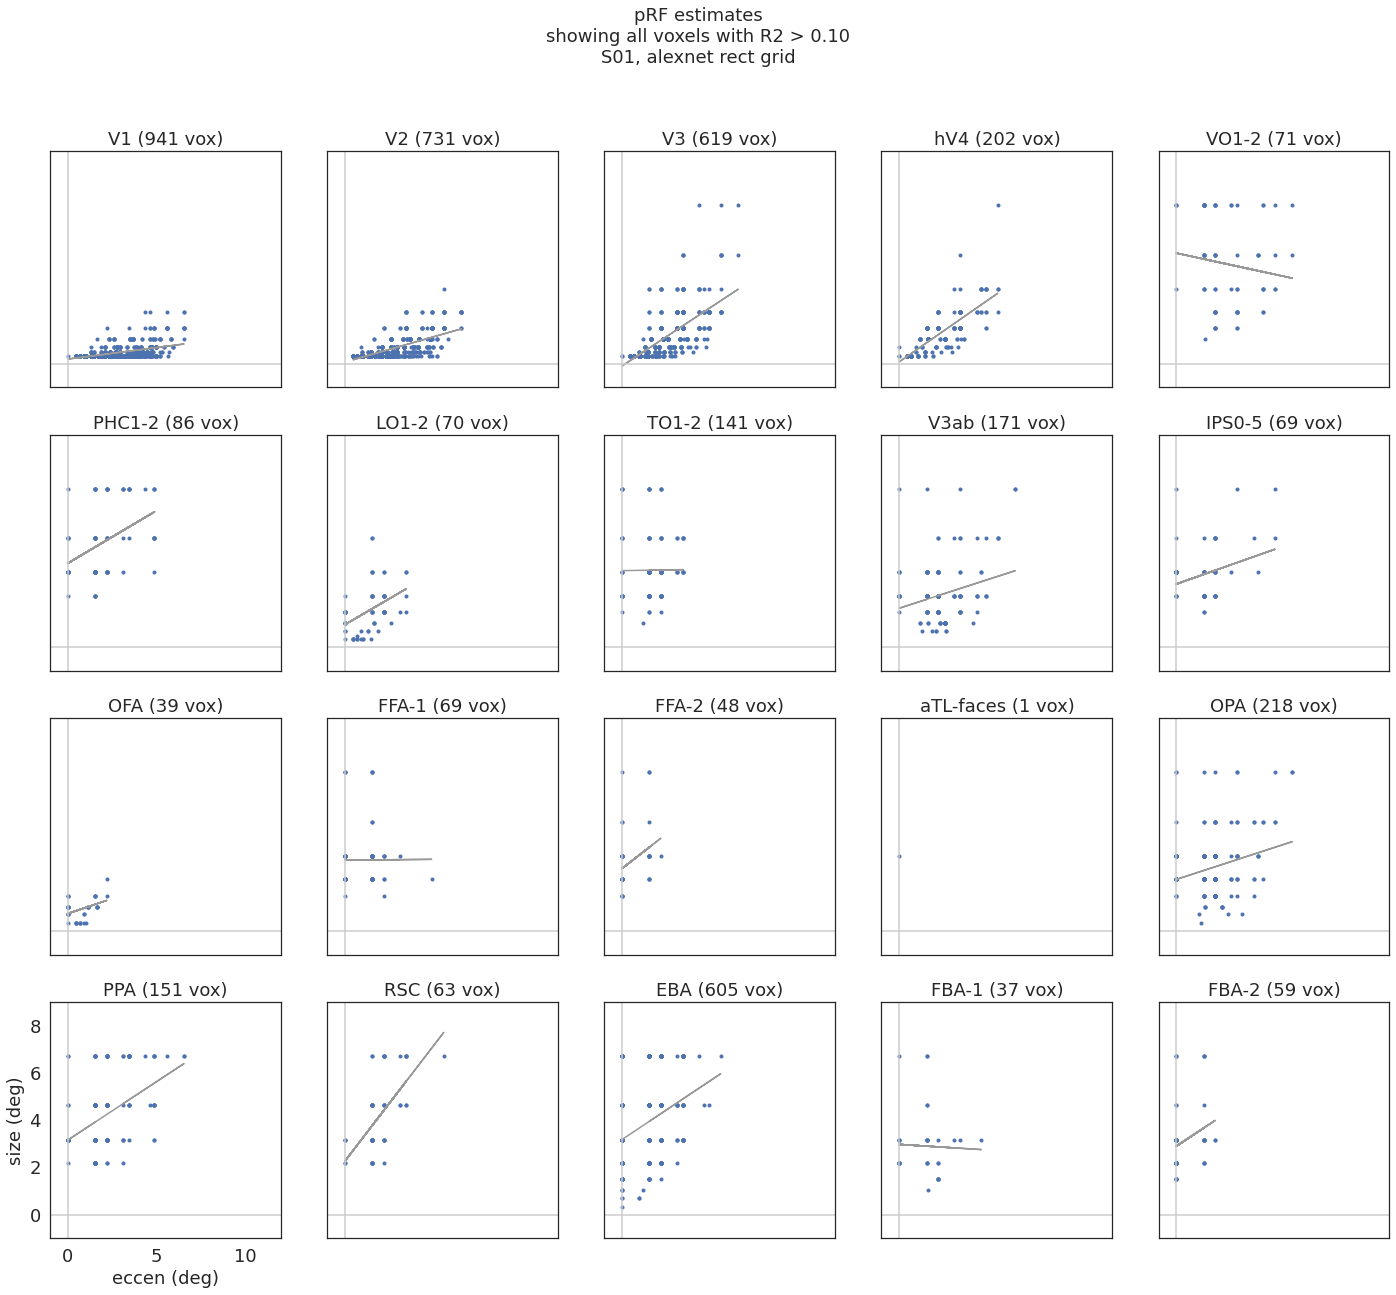

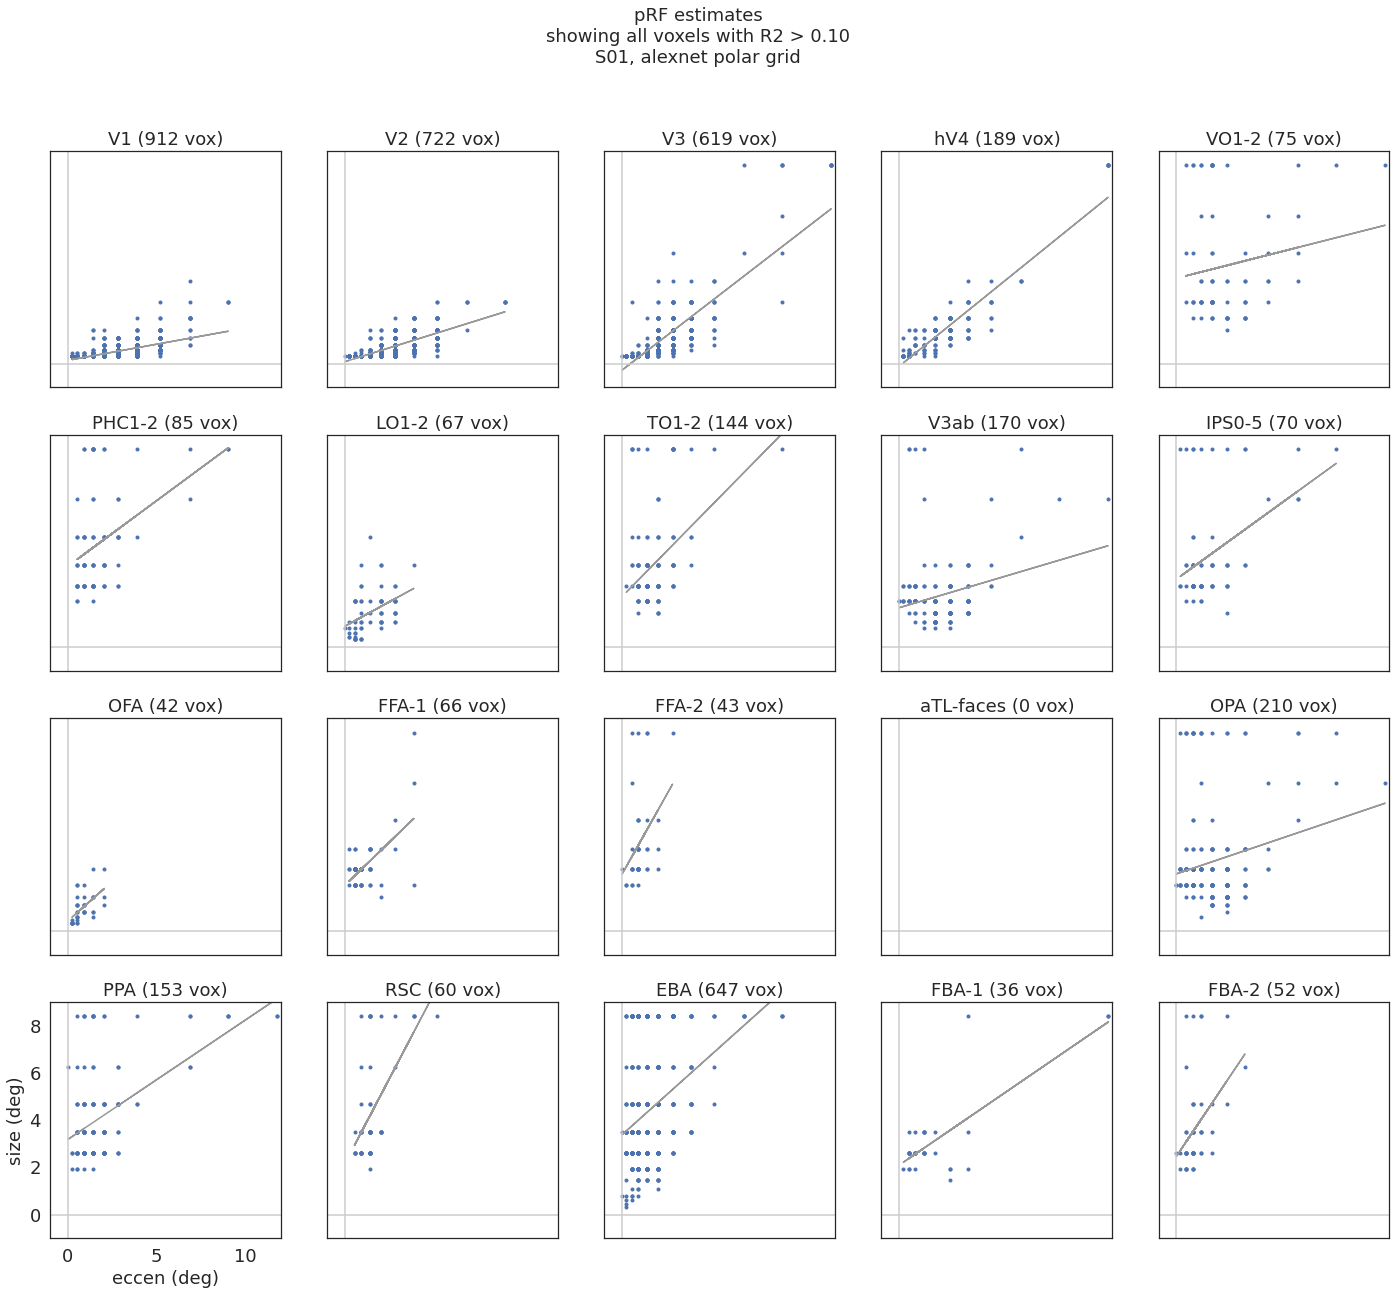

In [13]:
plot_utils.set_all_font_sizes(fs = 18)
plot_prf_params.plot_size_vs_eccen(subject, fitting_type1, out1, roi_def=roi_def, skip_inds=skip_inds, \
                                   r2_cutoff=0.10, fig_save_folder=fig_save_folder, \
                                  eccen_lims = [-1, 12], size_lims=[-1, 9])
plot_prf_params.plot_size_vs_eccen(subject, fitting_type2, out2, roi_def=roi_def, skip_inds=skip_inds, \
                                   r2_cutoff=0.10, fig_save_folder=fig_save_folder, \
                                  eccen_lims = [-1, 12], size_lims=[-1, 9])

Correlation of param across all ROIs, voxels with R2>0.10
ecc
0.3656253221364455
angle
0.6963457258845661
size
0.08966807878598447


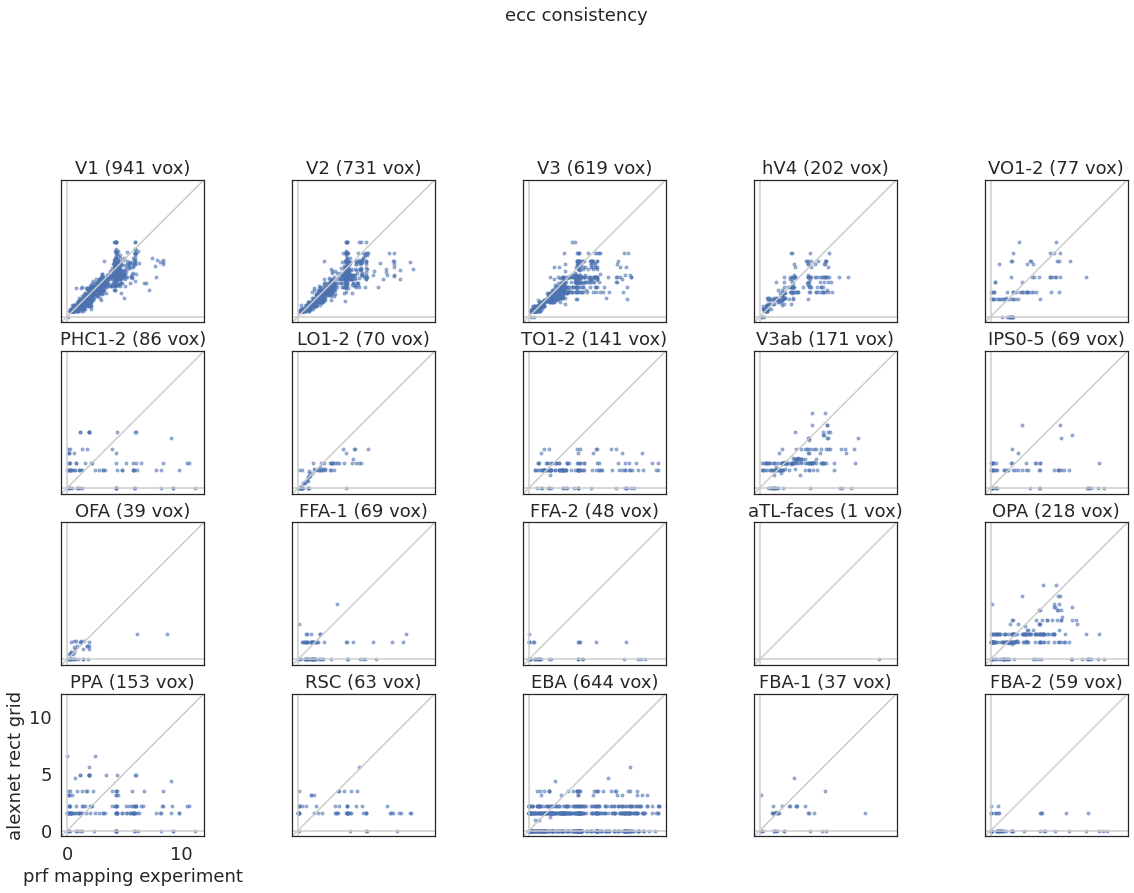

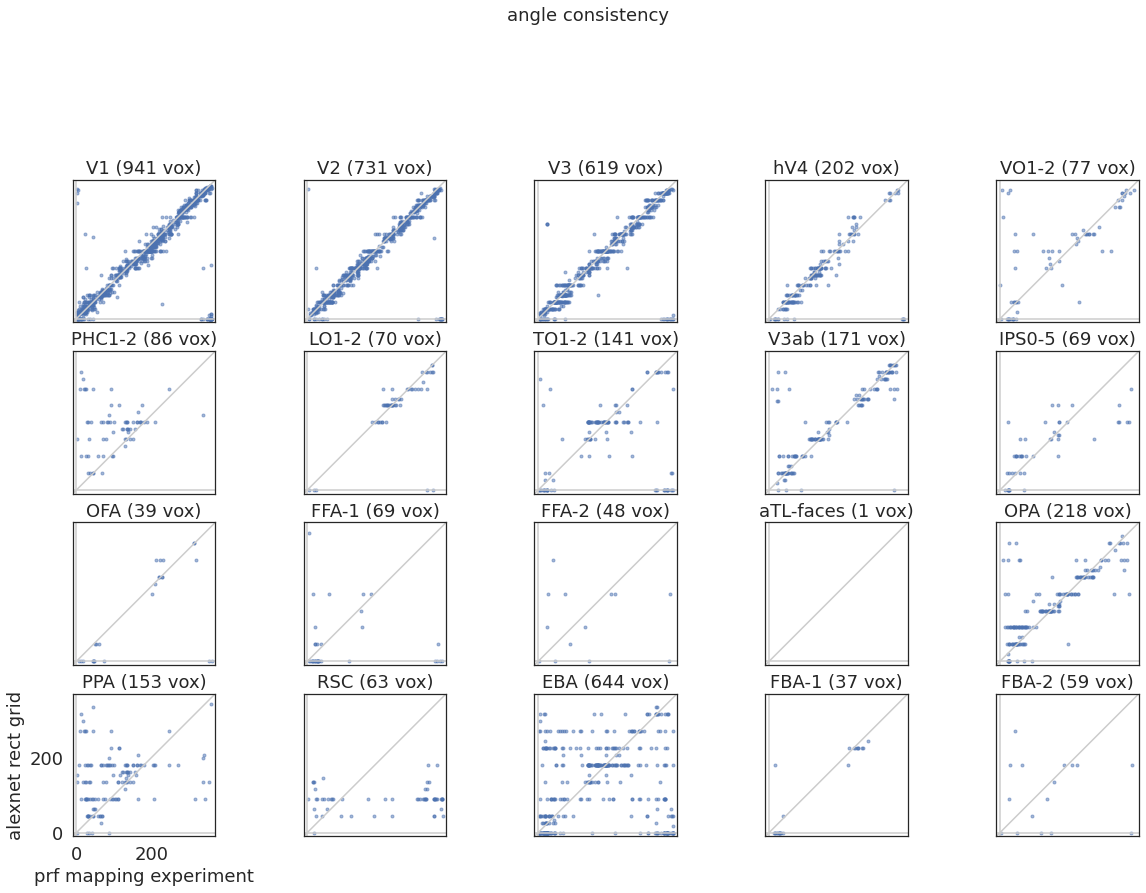

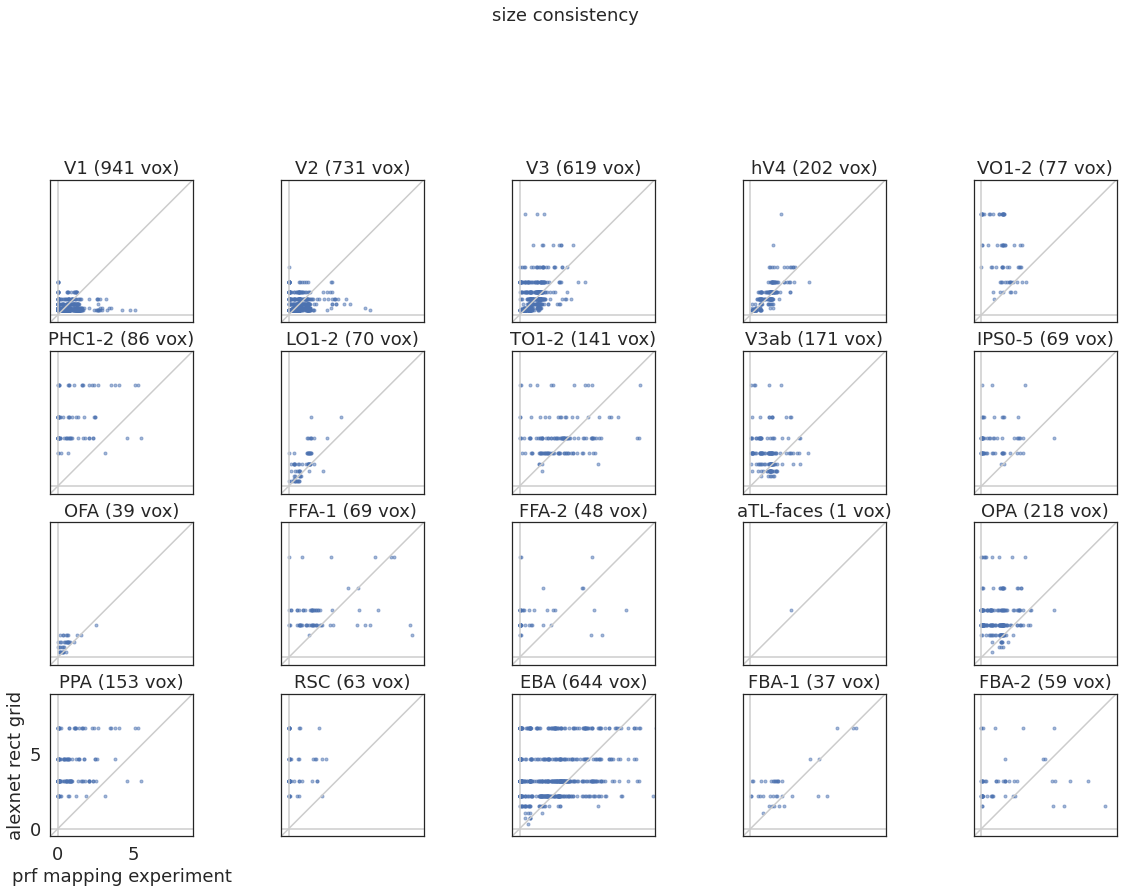

In [14]:

pars1 = [eccen_mapping, angle_mapping, size_mapping]
pars2 = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)
parnames = ['ecc','angle','size']

r2_thresh = 0.10
print('Correlation of param across all ROIs, voxels with R2>%.2f'%r2_thresh)
for pp in range(3):
    print(parnames[pp])
    good_voxels = (out1['val_r2'][:,0]>r2_thresh) \
                    & ~np.isnan(pars1[pp]) & ~np.isnan(pars2[pp]) \
                    & (eccen_mapping<100)
    good_voxels = np.squeeze(good_voxels)
    corr_all = np.corrcoef(pars1[pp][good_voxels], pars2[pp][good_voxels])[0,1]
    print(corr_all)

plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)

parlims = [[-0.5, 12], [-10, 370], [-0.5, 9]]

for pp in range(3):

    models1 = pars1[pp][:,np.newaxis]
    models2 = pars2[pp][:,np.newaxis]

    inds2use = (out1['val_r2'][:,0]>r2_thresh) & (rsq_mapping>0)

    sp = plot_utils.scatter_plot(color=[0.29803922, 0.44705882, 0.69019608, 0.5], xlims = parlims[pp], \
                                 ylims = parlims[pp], 
                                 xlabel='prf mapping experiment', ylabel=fitting_type1, 
                                                            show_diagonal=True, show_axes=True);

    if fig_size is None:
        fig_size = (20,18)
    plot_utils.create_roi_subplots(np.concatenate([models1, models2], axis=1), inds2use, sp, subject, out1,\
                        suptitle='%s consistency'%parnames[pp], \
                       label_just_corner=True, figsize=fig_size, roi_def=roi_def, skip_inds=skip_inds)
    plt.gcf().subplots_adjust(bottom=0.5)
    

Correlation of param across all ROIs, voxels with R2>0.10
ecc
0.3678310535645834
angle
0.6204331844288917
size
0.36017782317784097


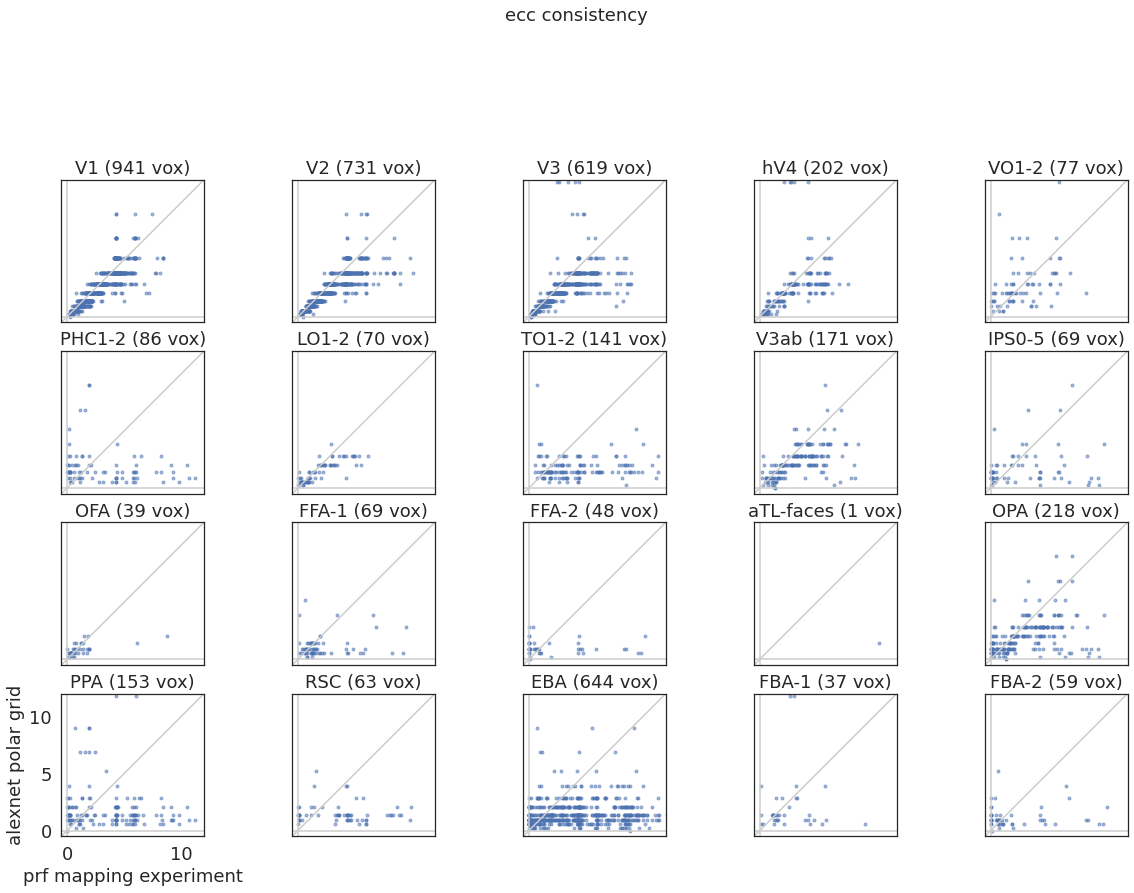

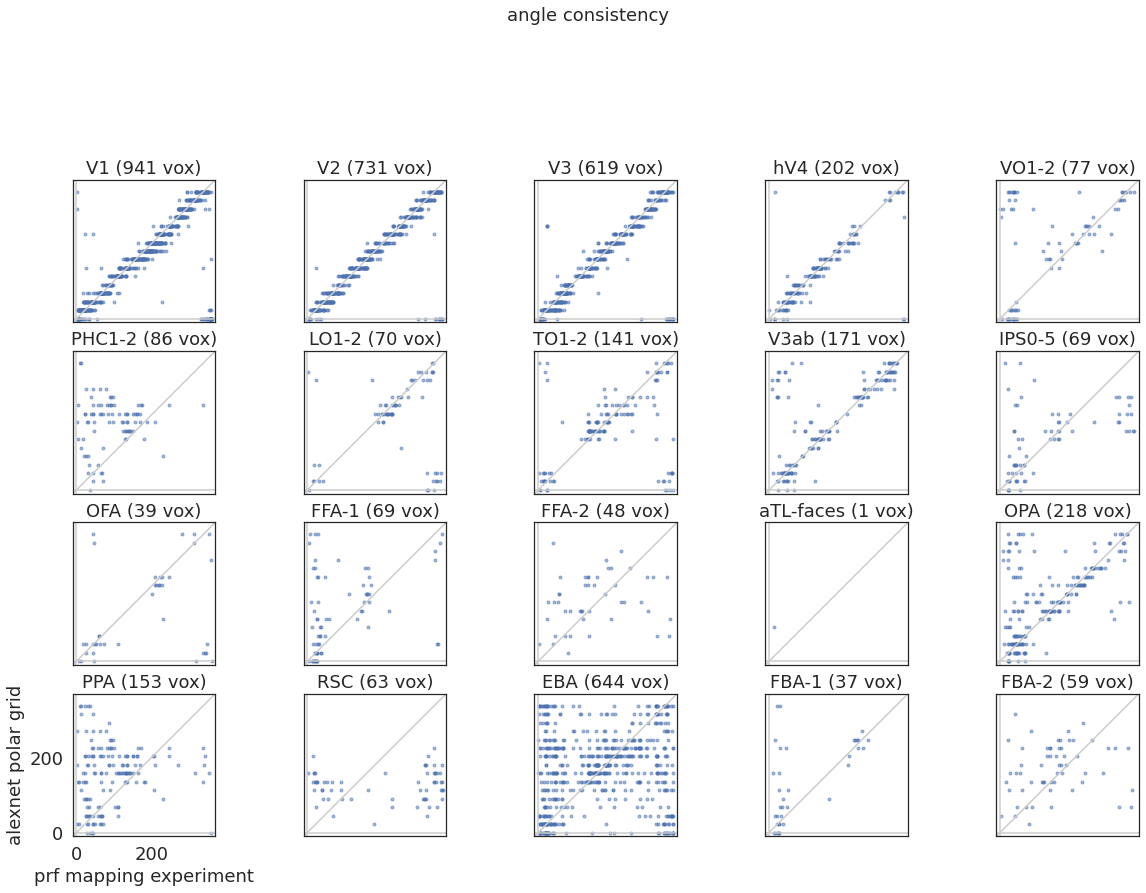

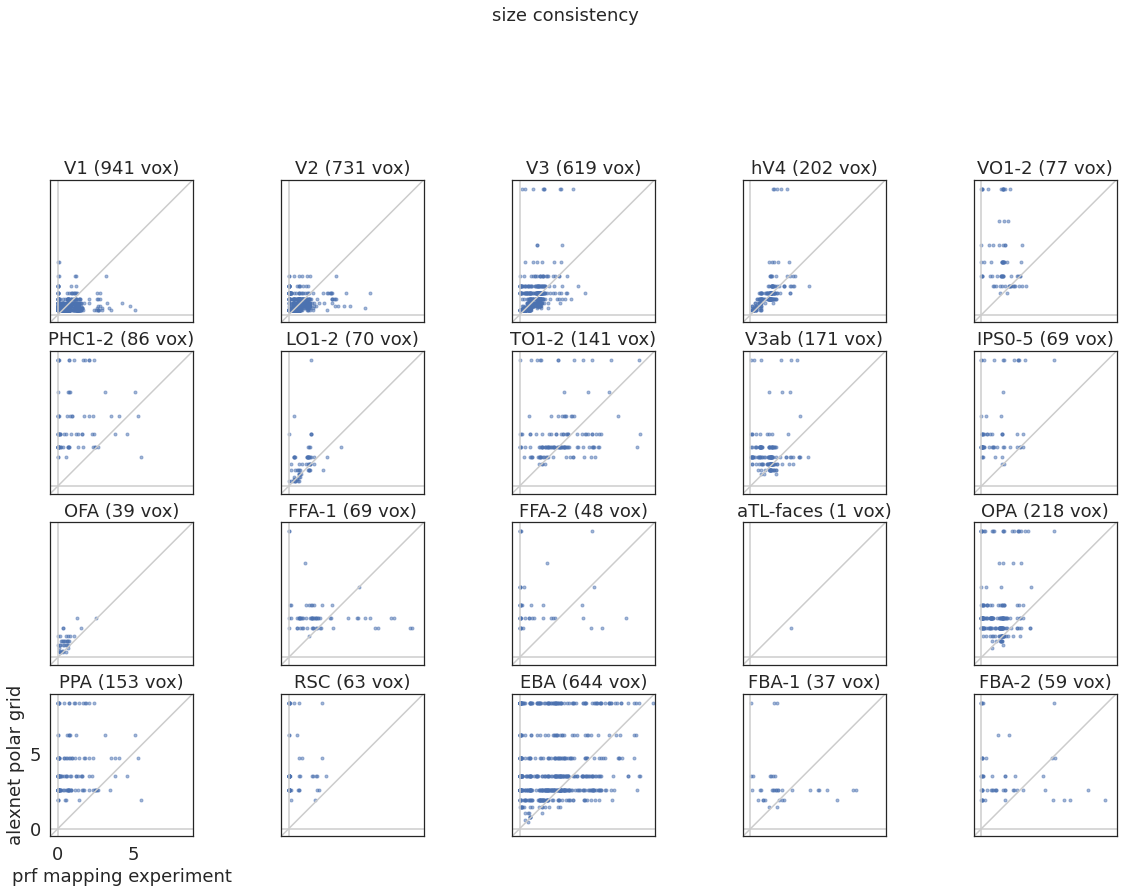

In [15]:

pars1 = [eccen_mapping, angle_mapping, size_mapping]
pars2 = plot_prf_params.get_prf_pars_deg(out2, screen_eccen_deg=8.4)
parnames = ['ecc','angle','size']

r2_thresh = 0.10
print('Correlation of param across all ROIs, voxels with R2>%.2f'%r2_thresh)
for pp in range(3):
    print(parnames[pp])
    good_voxels = (out2['val_r2'][:,0]>r2_thresh) \
                    & ~np.isnan(pars1[pp]) & ~np.isnan(pars2[pp]) \
                    & (eccen_mapping<100)
    good_voxels = np.squeeze(good_voxels)
    corr_all = np.corrcoef(pars1[pp][good_voxels], pars2[pp][good_voxels])[0,1]
    print(corr_all)
    
plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)

parlims = [[-0.5, 12], [-10, 370], [-0.5, 9]]


for pp in range(3):

    models1 = pars1[pp][:,np.newaxis]
    models2 = pars2[pp][:,np.newaxis]

    inds2use = (out1['val_r2'][:,0]>r2_thresh) & (rsq_mapping>0)

    sp = plot_utils.scatter_plot(color=[0.29803922, 0.44705882, 0.69019608, 0.5], xlims = parlims[pp], \
                                 ylims = parlims[pp], 
                                 xlabel='prf mapping experiment', ylabel=fitting_type2, 
                                                            show_diagonal=True, show_axes=True);

    if fig_size is None:
        fig_size = (20,18)
    plot_utils.create_roi_subplots(np.concatenate([models1, models2], axis=1), inds2use, sp, subject, out2,\
                        suptitle='%s consistency'%parnames[pp], \
                       label_just_corner=True, figsize=fig_size, roi_def=roi_def, skip_inds=skip_inds)
    plt.gcf().subplots_adjust(bottom=0.5)
    

Correlation of param across all ROIs, voxels with R2>0.10
ecc
0.7797112700605077
angle
0.7890886588003431
size
0.4079672434824184


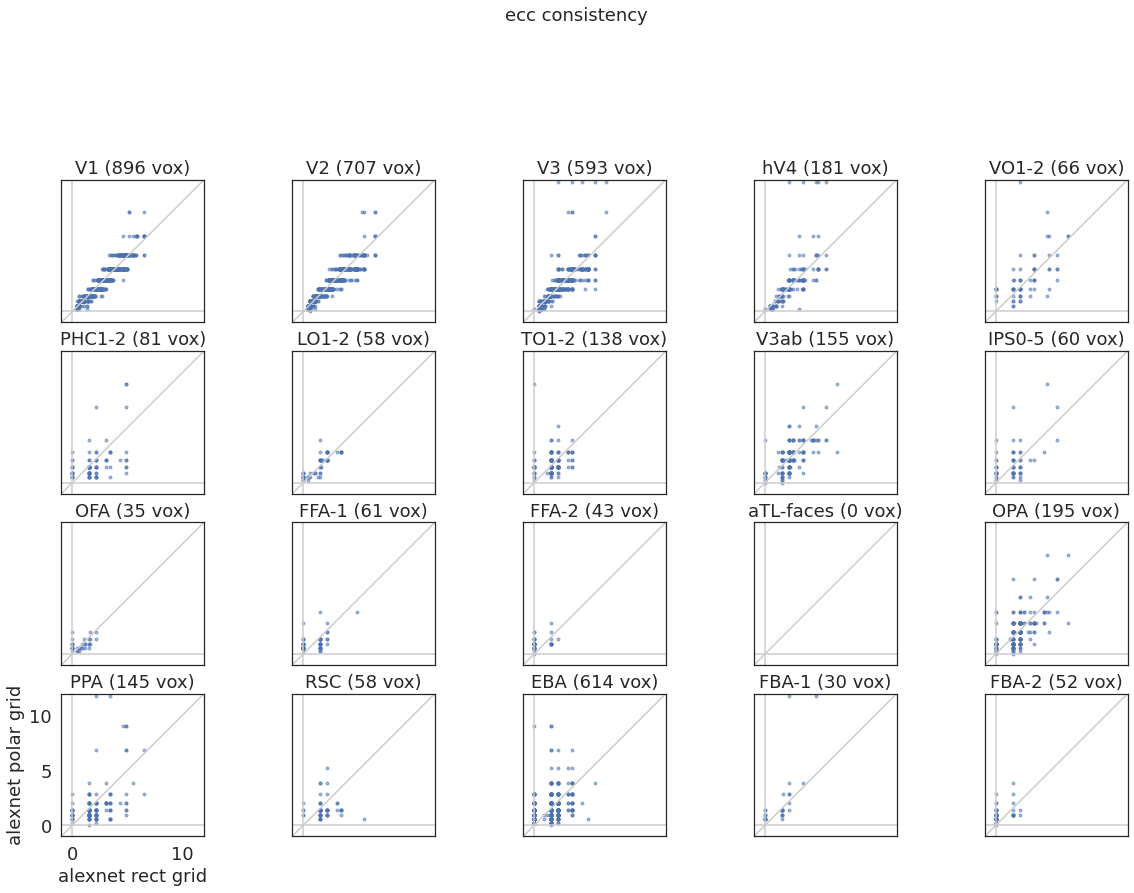

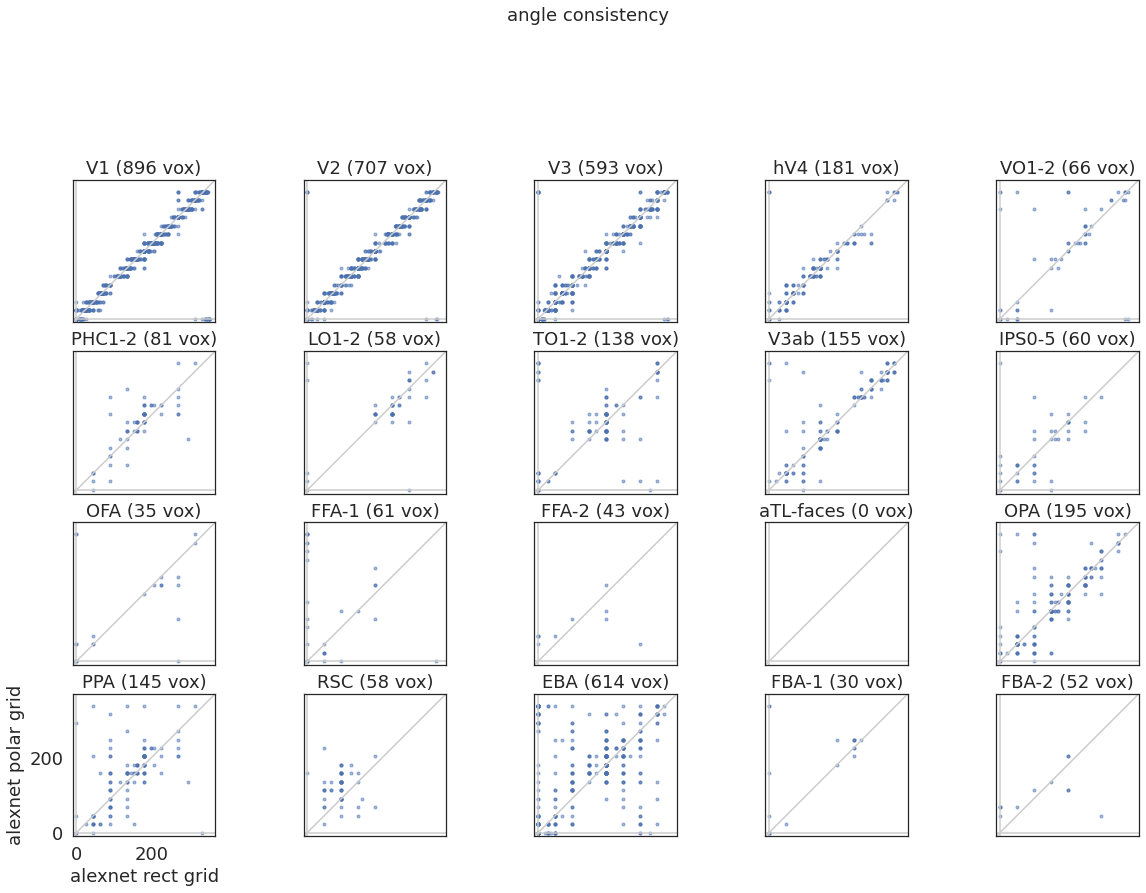

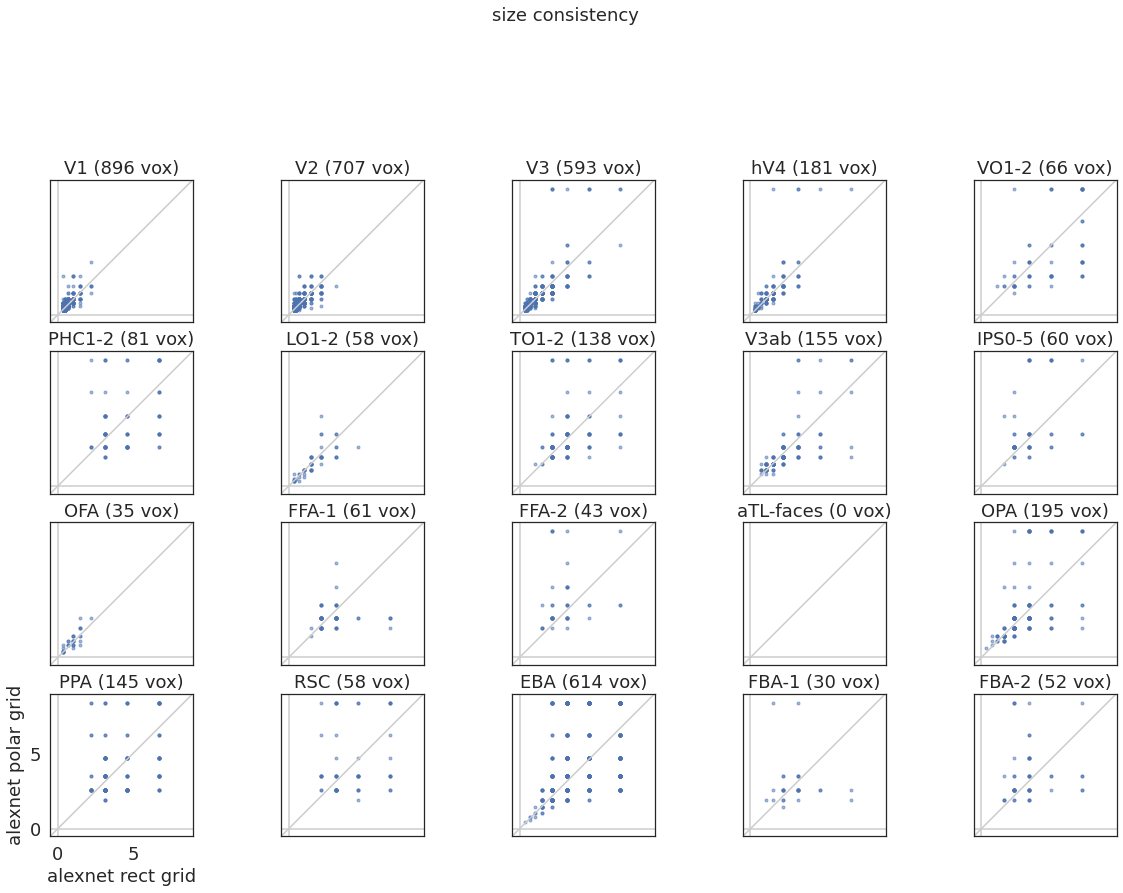

In [16]:
pars1 = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)
pars2 = plot_prf_params.get_prf_pars_deg(out2, screen_eccen_deg=8.4)
parnames = ['ecc','angle','size']

r2_thresh = 0.10
print('Correlation of param across all ROIs, voxels with R2>%.2f'%r2_thresh)
for pp in range(3):
    print(parnames[pp])
    good_voxels = (out2['val_r2'][:,0]>r2_thresh) & (out1['val_r2'][:,0]>r2_thresh) \
                    & ~np.isnan(pars1[pp]) & ~np.isnan(pars2[pp]) \
                    & (eccen_mapping<100)
    good_voxels = np.squeeze(good_voxels)
    corr_all = np.corrcoef(pars1[pp][good_voxels], pars2[pp][good_voxels])[0,1]
    print(corr_all)

from utils import nsd_utils
plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)
r2_thresh = 0.10

parlims = [[-1, 12], [-10, 370], [-0.5, 9]]

for pp in range(3):
    

    models1 = pars1[pp][:,np.newaxis]
    models2 = pars2[pp][:,np.newaxis]
#     print(models2[0:10])

    inds2use = (out1['val_r2'][:,0]>r2_thresh) & (out2['val_r2'][:,0]>r2_thresh) 
#     inds2use = inds2use & (pars2[0]>0)
#     inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0) 
#     inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0.1) 
#     inds2use = np.ones((len(retlabs),))==1

    sp = plot_utils.scatter_plot(color=[0.29803922, 0.44705882, 0.69019608, 0.5], xlims = parlims[pp], \
                                 ylims = parlims[pp], 
                                 xlabel=fitting_type1, ylabel=fitting_type2, 
                                                            show_diagonal=True, show_axes=True);

    if fig_size is None:
        fig_size = (20,18)
    plot_utils.create_roi_subplots(np.concatenate([models1, models2], axis=1), inds2use, sp, subject, out1,\
                        suptitle='%s consistency'%parnames[pp], \
                       label_just_corner=True, figsize=fig_size, roi_def=roi_def, skip_inds=skip_inds)
    plt.gcf().subplots_adjust(bottom=0.5)
    

In [17]:
r2_thresh = 0.10
print('Correlation of param across all ROIs, voxels with R2>%.2f'%r2_thresh)
for pp in range(3):
    print(parnames[pp])
    good_voxels = (out1['val_r2'][:,0]>r2_thresh) & (out2['val_r2'][:,0]>r2_thresh) & ~np.isnan(pars1[pp]) & ~np.isnan(pars2[pp])
    good_voxels = np.squeeze(good_voxels)
    corr_all = np.corrcoef(pars1[pp][good_voxels], pars2[pp][good_voxels])[0,1]
    print(corr_all)

Correlation of param across all ROIs, voxels with R2>0.10
ecc
0.7797112700605077
angle
0.7890886588003431
size
0.4079672434824184


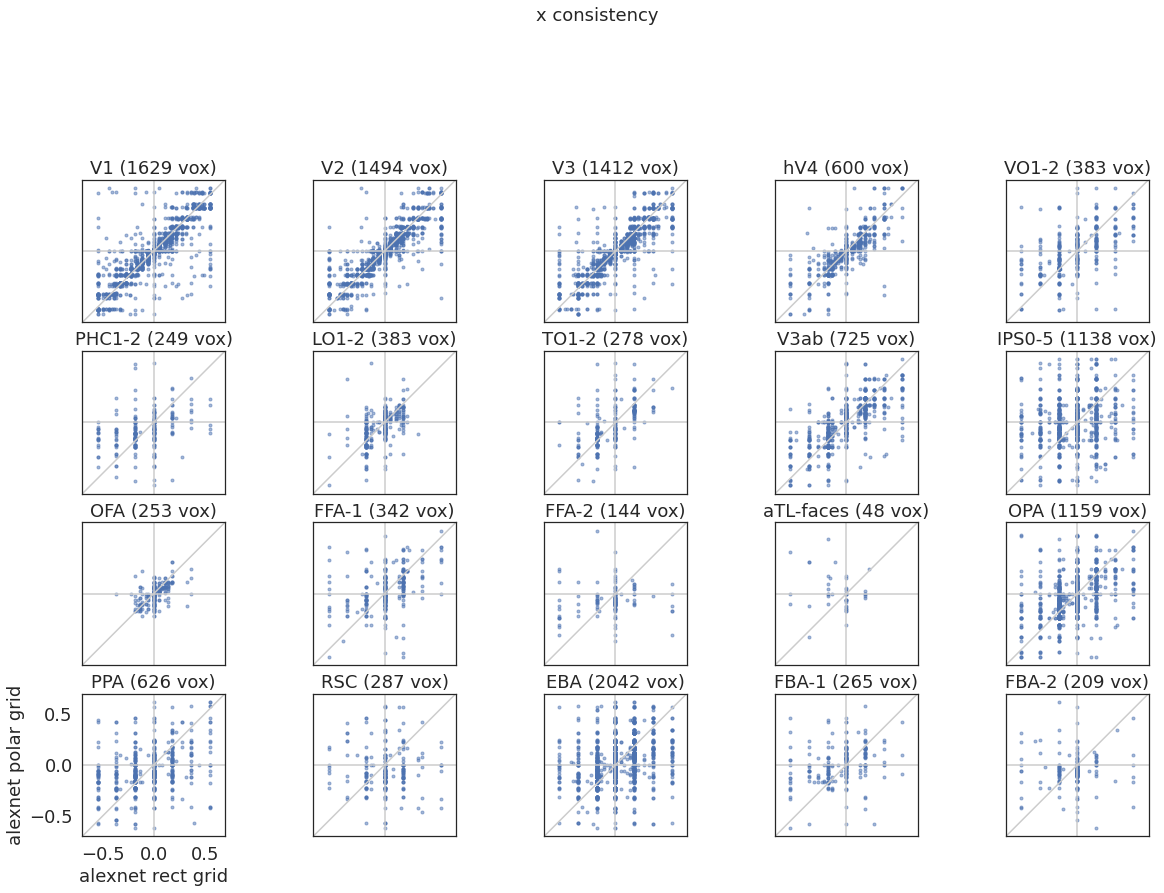

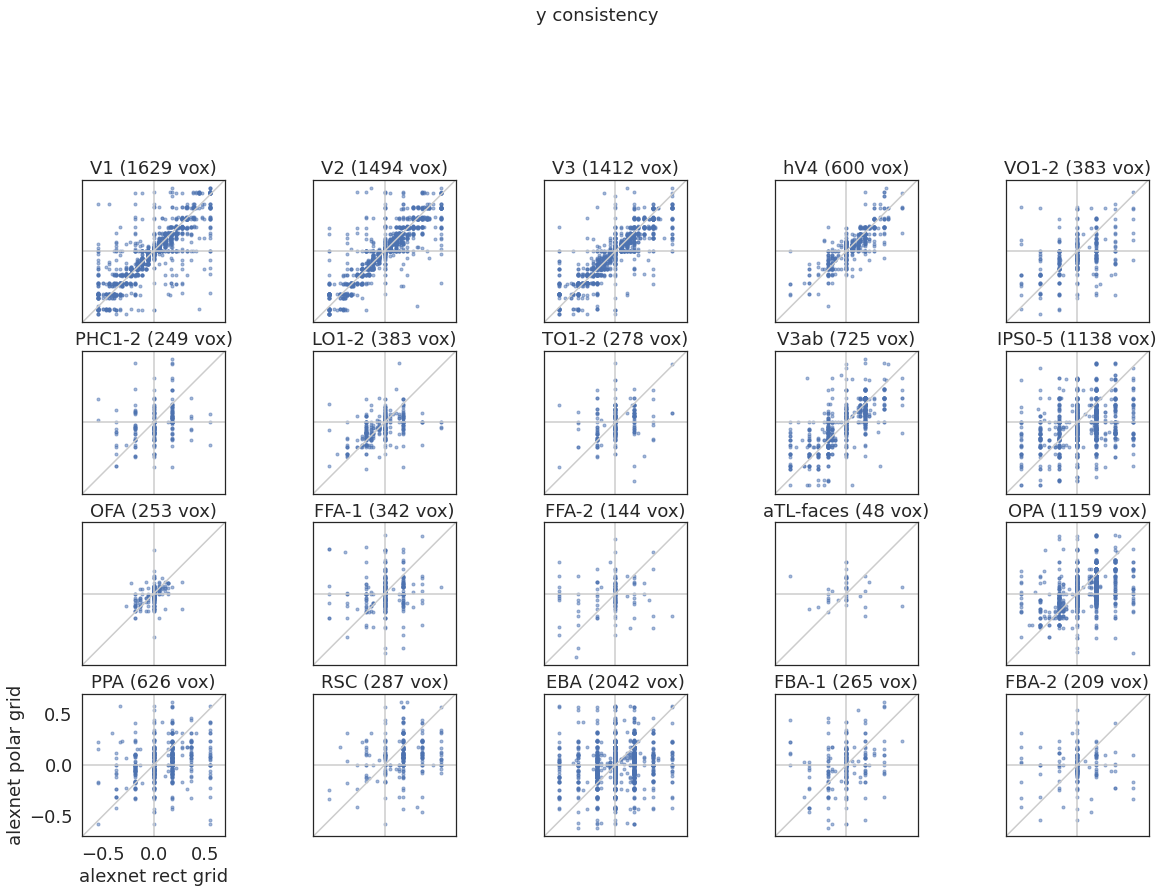

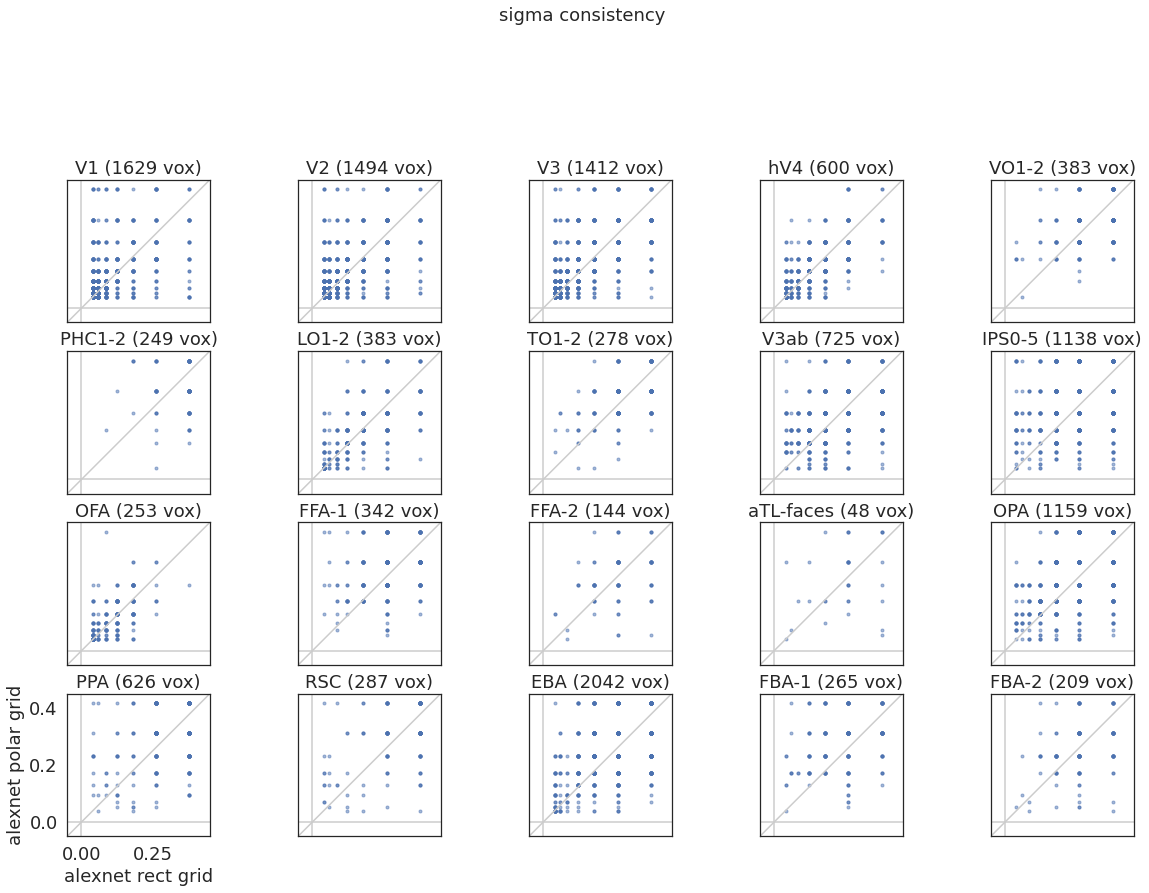

Stopping server


In [18]:
from utils import nsd_utils
plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)
parnames = ['x','y','sigma']
parlims = [[-0.7, 0.7], [-0.7, 0.7], [-0.05, 0.45]]
for pp in range(3):
    

    models1 = out1['best_params'][0][:,0,pp:pp+1]
    models2 = out2['best_params'][0][:,0,pp:pp+1]

    inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0) 
#     inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0.1) 
#     inds2use = np.ones((len(retlabs),))==1

    sp = plot_utils.scatter_plot(color=[0.29803922, 0.44705882, 0.69019608, 0.5], xlims = parlims[pp], \
                                 ylims = parlims[pp], 
                                 xlabel=fitting_type1, ylabel=fitting_type2, 
                                                            show_diagonal=True, show_axes=True);

    if fig_size is None:
        fig_size = (20,18)
    plot_utils.create_roi_subplots(np.concatenate([models1, models2], axis=1), inds2use, sp, subject, out1,\
                        suptitle='%s consistency'%parnames[pp], \
                       label_just_corner=True, figsize=fig_size, roi_def=roi_def, skip_inds=skip_inds)
    plt.gcf().subplots_adjust(bottom=0.5)
    


[[1.         0.13814066]
 [0.13814066 1.        ]]


(-0.48874483090476134,
 10.269888746162177,
 0.016799987107515346,
 7.039200105518103)

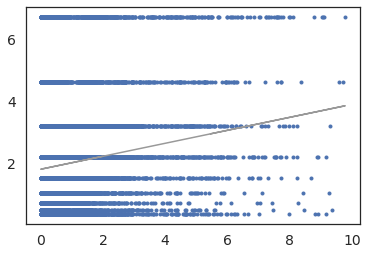

In [22]:
vox2plot = (~np.isnan(size_mapping)) & (rsq_mapping>0) & (size_mapping<10) & (best_size_deg!=84)
plt.figure();
xvals =  size_mapping[vox2plot]
yvals = best_size_deg[vox2plot]
X = np.concatenate([xvals[:,np.newaxis], np.ones((len(xvals),1))], axis=1)
y = yvals[:,np.newaxis]
linefit =  np.linalg.pinv(X) @ y
yhat = xvals*linefit[0] + linefit[1]
plt.plot(xvals,yvals,'.')
plt.plot(xvals,yhat, '-',color=[0.6, 0.6, 0.6])
print(np.corrcoef(xvals,yvals))
plt.axis('equal')
plt.

In [8]:
np.max(models2)

0.4000000059604645